In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

In [2]:
def get_list(file):
    ff = open(file)
    lines = ff.readlines()
    return list(map(float, lines[1][:-2].strip().split(",")))

In [3]:
scores = []
for i in range(5):
    scores.append({ "Accuracy": get_list(f"T{i}/Acc.txt"), 
                    "Precision": get_list(f"T{i}/Prec.txt"), 
                    "F1": get_list(f"T{i}/F1.txt"), 
                    "Recall": get_list(f"T{i}/Rec.txt")})

In [4]:
eds = []
for i in range(5):
       eds.append({"GED": get_list(f"T{i}/ged.txt"), "LED": get_list(f"T{i}/led.txt")})

In [5]:
def plot_scores(dataset):
    xlabels = np.array(['1', '2', '3', '4', '5'])
    x = np.arange(len(xlabels)) 

    width = 0.1  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for metric, val in scores[dataset].items():
        offset = width * multiplier
        rects = ax.bar(x + offset, val, width, label=metric)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Feature map equation')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for Dataset {dataset}')
    ax.set_xticks(x + 1.5*width, xlabels)
    ax.legend(ncols=3)

    plt.savefig(f"Figures/scores_{dataset}")

In [6]:
def plot_ged(dataset):
    xlabels = np.array(['1', '2', '3', '4', '5'])
    plt.plot(xlabels, eds[dataset]['GED'])
    plt.title(f'Normalised Global Effective Dimension for Dataset {dataset}')
    plt.xlabel('Feature map equation')
    plt.ylabel('Normalised GED')
    plt.savefig(f"Figures/ged_{dataset}")

def plot_led(dataset):
    xlabels = np.array(['1', '2', '3', '4', '5'])
    plt.plot(xlabels, eds[dataset]['LED'])
    plt.title(f'Local Effective Dimension for Dataset {dataset}')
    plt.xlabel('Feature map equation')
    plt.ylabel('LED')
    plt.savefig(f"Figures/led_{dataset}")

In [45]:
def plot_fm_comp(dataset):
    xlabels = np.array(['1', '2', '3', '4', '5'])
    x = np.arange(len(xlabels)) 

    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    ax.plot(xlabels, eds[dataset]['GED'], label='Normalized GED')
    ax.plot(xlabels, eds[dataset]['LED'], label='LED')
    ax.plot(xlabels, scores[dataset]['Accuracy'], label='Accuracy', linewidth = 1)
    ax.plot(xlabels, scores[dataset]['Precision'], label='Precision', linewidth = 1, linestyle='dashed')
    ax.plot(xlabels, scores[dataset]['Recall'], label='Recall', linewidth = 1, linestyle='dashdot')
    ax.plot(xlabels, scores[dataset]['F1'], label='F1', linewidth = 1, linestyle='dotted')
    
    ax2.plot(xlabels, eds[dataset]['GED'], label='Normalized GED')
    ax2.plot(xlabels, eds[dataset]['LED'], label='LED')
    ax2.plot(xlabels, scores[dataset]['Accuracy'], label='Accuracy', linewidth = 1)
    ax2.plot(xlabels, scores[dataset]['Precision'], label='Precision', linewidth = 1, linestyle='dashed')
    ax2.plot(xlabels, scores[dataset]['Recall'], label='Recall', linewidth = 1, linestyle='dashdot')
    ax2.plot(xlabels, scores[dataset]['F1'], label='F1', linewidth = 1, linestyle='dotted')

    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(.5, 1)  # outliers only
    ax2.set_ylim(-0.5, -0.35)  # most of the data

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    
    ax.set_title(f'Comparision of GED, LED and Scores for Dataset {dataset}', loc="center")
    ax2.set_xlabel('Feature map equation')

    plt.legend(bbox_to_anchor = (1.4, 1.1), loc='center right')

    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.show()

    # f.savefig(f"Figures/comp_{dataset}", bbox_inches='tight')

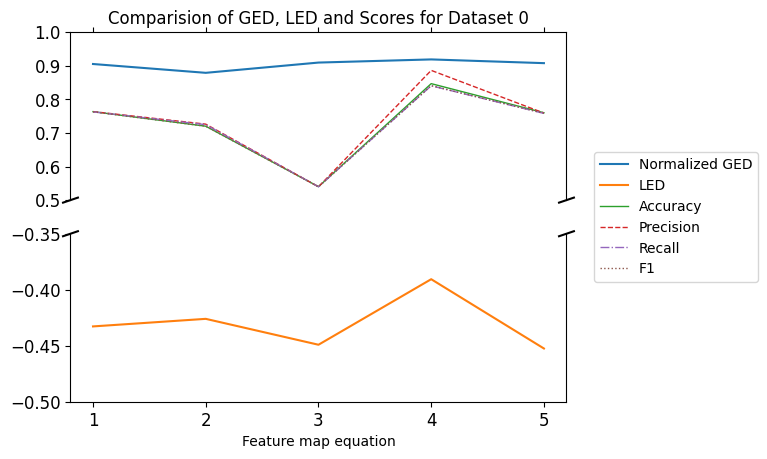

In [46]:
plot_fm_comp(0)

In [47]:
def plot_ds_comp(fm_num):
    fm = fm_num - 1
    xlabels = np.array(['0', '1', '2', '3', '4'])
    x = np.arange(len(xlabels)) 
    
    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

    ax.plot(xlabels, [eds[i]['GED'][fm] for i in range(5)], label='NGED')
    ax.plot(xlabels, [eds[i]['LED'][fm] for i in range(5)], label='LED')
    ax.plot(xlabels, [scores[i]['Accuracy'][fm] for i in range(5)], label='Accuracy')
    ax.plot(xlabels, [scores[i]['Precision'][fm] for i in range(5)], label='Precision')
    ax.plot(xlabels, [scores[i]['Recall'][fm] for i in range(5)], label='Recall')
    ax.plot(xlabels, [scores[i]['F1'][fm] for i in range(5)], label='F1')

    ax2.plot(xlabels, [eds[i]['GED'][fm] for i in range(5)], label='NGED')
    ax2.plot(xlabels, [eds[i]['LED'][fm] for i in range(5)], label='LED')
    ax2.plot(xlabels, [scores[i]['Accuracy'][fm]  for i in range(5)], label='Accuracy')
    ax2.plot(xlabels, [scores[i]['Precision'][fm] for i in range(5)], label='Precision')
    ax2.plot(xlabels, [scores[i]['Recall'][fm] for i in range(5)], label='Recall')
    ax2.plot(xlabels, [scores[i]['F1'][fm] for i in range(5)], label='F1')

    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(.3, 1)  # outliers only
    ax2.set_ylim(-0.5, -0.35)  # most of the data

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    ax.set_title(f'Comparision of GED, LED and Scores for Feature Map {fm_num}', loc="center")
    ax2.set_xlabel('Dataset')

    plt.legend(bbox_to_anchor = (1.3, 1.1), loc='center right')

    plt.show()

    # f.savefig(f"Figures/comp_{dataset}", bbox_inches='tight')

In [48]:
for i in range(5):
    print("{:0.4f}".format(pearsonr(scores[i]['Accuracy'], eds[i]['GED'])[0]), end=" ")
print()
for i in range(5):
    print("{:0.4f}".format(pearsonr(scores[i]['Accuracy'], eds[i]['LED'])[0]), end=" ")
print()
for i in range(5):
    print("{:0.4f}".format(pearsonr(scores[i]['F1'], eds[i]['GED'])[0]), end=" ")
print()
for i in range(5):
    print("{:0.4f}".format(pearsonr(scores[i]['F1'], eds[i]['LED'])[0]), end=" ")

0.1614 0.2850 -0.3369 -0.6656 -0.3153 
0.6595 -0.1790 -0.7975 -0.7581 0.0879 
0.1497 0.6291 -0.3735 -0.5722 -0.4487 
0.6512 -0.5320 -0.7399 -0.7195 -0.0627 